In [1]:
import pydicom
import numpy as np
import cv2
import imageio

In [2]:
# Load DICOM file
dcm_path = 'XA_000011.dicom'
ds = pydicom.dcmread(dcm_path)

# Check if it has multiple frames
if hasattr(ds, 'NumberOfFrames'):
    num_frames = int(ds.NumberOfFrames)
    frames = ds.pixel_array
else:
    frames = np.expand_dims(ds.pixel_array, axis=0)

# Normalize to 0–255 uint8
frames = [(255 * (f - np.min(f)) / (np.max(f) - np.min(f))).astype(np.uint8) for f in frames]

# Convert grayscale to RGB
rgb_frames = [cv2.cvtColor(f, cv2.COLOR_GRAY2RGB) for f in frames]

# ✅ Use ffmpeg plugin explicitly
video_filename = 'output_xray.mp4'
writer = imageio.get_writer(video_filename, fps=5, format='ffmpeg')  # Force ffmpeg

# Write frames
for frame in rgb_frames:
    writer.append_data(frame)
writer.close()

print(f"Video saved as {video_filename}")

Video saved as output_xray.mp4


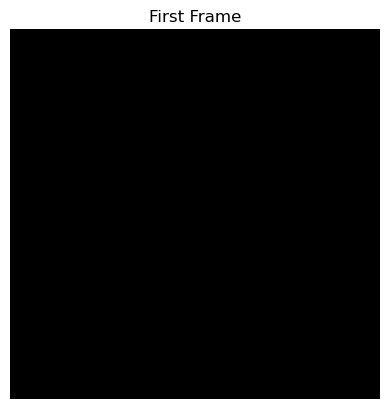

In [3]:
import matplotlib.pyplot as plt

# Show first frame after normalization
plt.imshow(rgb_frames[0])
plt.title("First Frame")
plt.axis("off")
plt.show()


In [4]:
# Check pixel values
raw_frames = ds.pixel_array
print("Raw pixel min:", np.min(raw_frames))
print("Raw pixel max:", np.max(raw_frames))


Raw pixel min: 4
Raw pixel max: 255


In [5]:
import pydicom
import numpy as np
import cv2
import imageio
import matplotlib.pyplot as plt

Raw pixel min: 26
Raw pixel max: 255


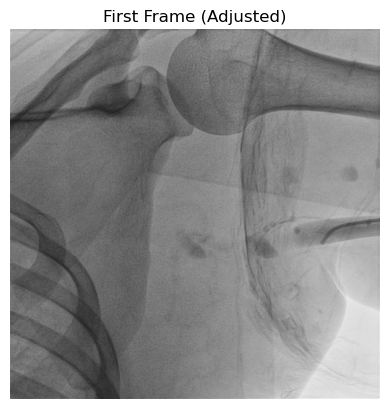

✅ Video saved as XA_000022.mp4


In [14]:
# --- Step 1: Load DICOM File ---
dcm_path = 'XA_000022.dicom'  # Replace with your filename
ds = pydicom.dcmread(dcm_path)

# --- Step 2: Get Pixel Array ---
if hasattr(ds, 'NumberOfFrames'):
    raw_frames = ds.pixel_array
else:
    raw_frames = np.expand_dims(ds.pixel_array, axis=0)

print("Raw pixel min:", np.min(raw_frames))
print("Raw pixel max:", np.max(raw_frames))

# --- Step 3: Normalize Pixel Values (using min=4, max=255) ---
frames = []
for f in raw_frames:
    f = f.astype(np.float32)
    f = (f - 4) / (255 - 4 + 1e-5)        # Rescale to 0–1
    f = (f * 255).clip(0, 255).astype(np.uint8)  # Convert to 8-bit grayscale
    frames.append(f)

# --- Step 4: Convert Grayscale to RGB ---
rgb_frames = [cv2.cvtColor(f, cv2.COLOR_GRAY2RGB) for f in frames]

# --- Step 5: Preview First Frame ---
plt.imshow(rgb_frames[0])
plt.title("First Frame (Adjusted)")
plt.axis("off")
plt.show()

# --- Step 6: Save to MP4 using imageio with ffmpeg ---
video_filename = 'XA_000022.mp4'
writer = imageio.get_writer(video_filename, fps=5, format='ffmpeg')  # Use FFmpeg

for frame in rgb_frames:
    writer.append_data(frame)
writer.close()

print(f"✅ Video saved as {video_filename}")